# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns

In [4]:
# %matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [5]:
athletes = pd.read_csv("athletes.csv")

In [18]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [105]:
# Sua análise começa aqui.
athletes['height'].shape[0]

11538

In [15]:
athletes.describe().drop(['id'], axis = 1)

,height,weight,gold,silver,bronze
count,11208.000000,10879.000000,11538.000000,11538.000000,11538.000000
mean,1.766282,72.068205,0.057722,0.056769,0.061016
std,0.112719,16.177334,0.255910,0.239147,0.243320
min,1.210000,31.000000,0.000000,0.000000,0.000000
25%,1.690000,60.000000,0.000000,0.000000,0.000000
50%,1.760000,70.000000,0.000000,0.000000,0.000000
75%,1.840000,81.000000,0.000000,0.000000,0.000000
max,2.210000,170.000000,5.000000,2.000000,2.000000


In [7]:
athletes.isna().sum()

id               0
name             0
nationality      0
sex              0
dob              1
height         330
weight         659
sport            0
gold             0
silver           0
bronze           0
dtype: int64

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

### O que é o teste de Shapiro Wilk?

O teste de Shapiro-Wilk é um teste de aderência à distribuição normal, que abreviamos para teste de normalidade. Nosso intuito é verificar se uma dada amostra veio ou não de uma distribuição normal. Ele é apropriado apenas para amostras pequenas, pois é excessivamente sensível a desvios pequenos de normalidade em amostras grandes, ficando limitado a implementações de até 5000 observações.

### Hipotése

* H0: As alturas __são normalmente distribuídas.__
* H1: As alturas __não são normalmente distribuídas.__

Obs.: Em um teste de hipóteses, formulamos duas hipóteses __complementares__ a respeito de um parâmetro populacional de interesse chamadas hipótese nula (_null hypothesis_) e hipótese alternativa (_alternative hypothesis_). Denotamos a hipótese nula por $H_{0}$ e a hipótese alternativa por $H_{1}$.

In [19]:
sample_alt_atletas = get_sample(athletes, 'height', n=3000)

In [44]:
def q1():
    # Retorne aqui o resultado da questão 1.
    test_shapiro = sct.shapiro(sample_alt_atletas)[1]
    print("p-value:",round(test_shapiro, 8))
    return test_shapiro > 0.05
q1()

p-value: 5.7e-07


False

__Análise dos resultados identificados__:

Passos a serem seguidos:

* Vamos plotar o histograma dessa variável (com, por exemplo, `bins=25`).
 * A forma do gráfico e o resultado do teste são condizentes? Por que?
* Vamos plotar o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

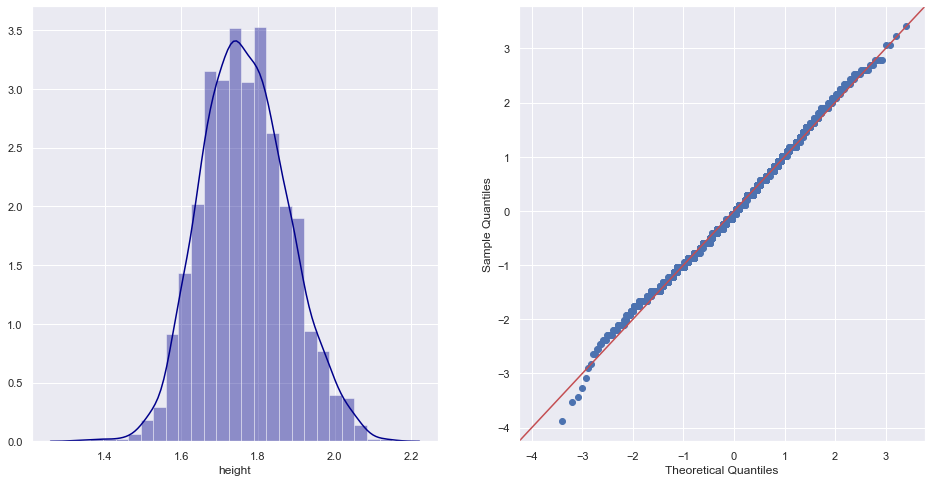

In [33]:
import statsmodels.api as sm
fig, axs = plt.subplots(ncols=2, figsize=(16,8))

# Histograma:
sns.distplot(sample_alt_atletas, bins=25, color='darkblue', ax=axs[0]);

# QQ-plot:
sm.qqplot(sample_alt_atletas, fit=True, line="45", ax=axs[1]);

* Histograma:

Como podemos ver o gráfico demonstra que o dados são distribuídos.

* QQ-Plot:

Os pontos azuis estão em cima da linha vermelha, sinalizando que os dados são normalmente distribuídos.

Obs.: O q-q plot é um gráfico para comparação de distribuições de probabilidades. Geralmente, uma das distribuições é teórica e com distribuição bem conhecida. Essa distribuição teórica é convencionalmente posta no eixo x. No eixo y, colocamos os quantis da nossa distribuição amostral, que gostaríamos de comparar com a teórica.

### Conclusões

Como podemos ver acima através do teste de Shapiro o valor do p-value é menor do que o alpha, lembrando que o alpha nessa análise foi de 5% e o p-value foi de 5x10^⁻7. Cabe ressaltar que para os casos que o p-value for menor do que o nível de significância  𝛼 , então temos evidências de que os dados não vêm de uma distribuição normal. Posteriormente ao analisarmos os dados utilizando o gráficos de histograma e o qq-plot observamos que os dados são normalmente distribuídos.

Por fim, como pode ser observado nas conclusões supracitadas o teste de shapiro e as análises dos gráficos não são coindizentes, sugerindo que seja necessário realizar uma análise mais profunda.

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

### O que é Jarque-Bera?

Assim como Shapiro-Wilk, o teste de Jarque-Bera é um teste de aderência à distribuição normal com $H_{0}$ sendo a normalidade dos dados. A diferença reside na estatística de teste utilizada.

O teste de Jarque-Bera tem como hipótese nula a normalidade. Assim, se o p-value for menor do que 5%, p<0,05, então o autor rejeita a normalidade. Já se p>0,05, aceita-se a normalidade.

In [51]:
# sample_alt_atletas = get_sample(athletes, 'height', n=3000)
def q2():
    test_jaque_bera = sct.jarque_bera(sample_alt_atletas)
    print("p-value:",round(test_jaque_bera[1],8))
    return bool(test_jaque_bera[1]>0.05)
q2()

p-value: 0.00147837


False

__Para refletir__:

* Esse resultado faz sentido?

### Conclusões

No teste de Jaque-Bera podemos identificar também que os dados do p-value são menores do que o 𝛼, indicando que os dados da amostra não são normalmente distribuídos.

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [53]:
sample_peso_atletas = get_sample(athletes, 'weight', n=3000)

In [79]:
def q3():
    # Retorne aqui o resultado da questão 3.
    normaltest = sct.normaltest(sample_peso_atletas)[1]
    print("p-value:",normaltest)
    return bool(normaltest > 0.05)
q3()

p-value: 1.5898922918029537e-111


False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

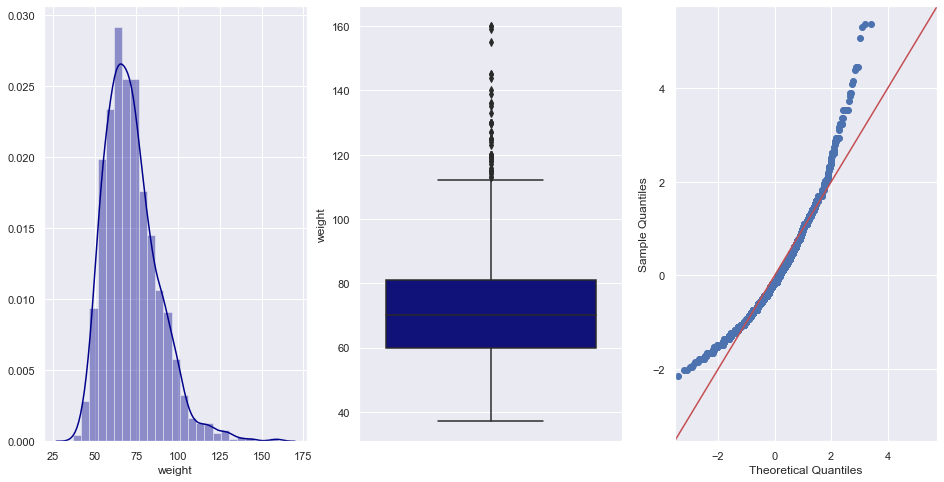

In [72]:
fig, axs = plt.subplots(ncols=3, figsize=(16,8))

#Histograma
sns.distplot(sample_peso_atletas, bins=25, color='darkblue', ax=axs[0]);

# Box plot:
sns.boxplot(sample_peso_atletas, orient='v', color='darkblue', ax=axs[1])

# QQ-plot:
sm.qqplot(sample_peso_atletas, fit=True, line="45", ax=axs[2]);

### Conclusões

Mais uma vez o p-value (1x10^-111) foi menor do que o valor de alpha (0.05), além disso como podemos no gráfico qq-plot os pontos azuis não estão sobre a reta demonstrnado que os dados não estão distribuídos.

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [92]:
def q4():
    normaltest_log = sct.normaltest(log_value)[1]
    print("p-value:",normaltest_log)
    return bool(normaltest_log > 0.05)
q4()

p-value: 1.0705572101256944e-10


False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

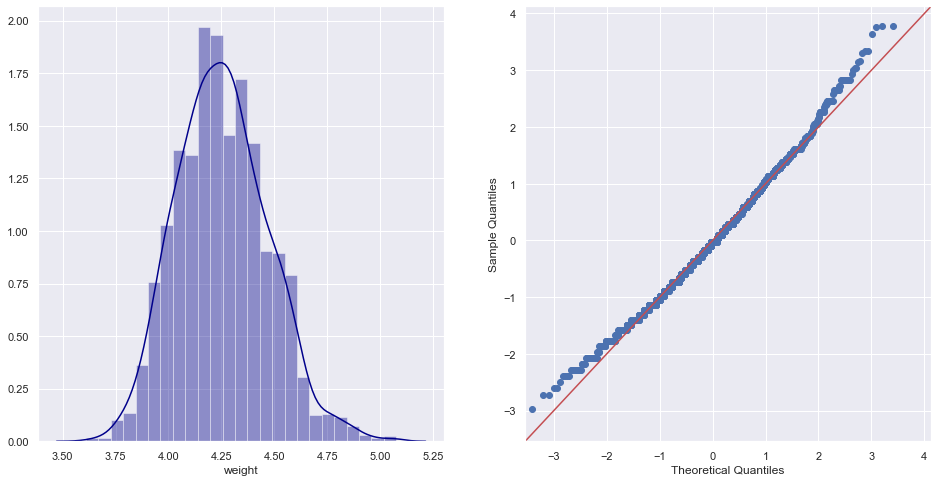

In [89]:
fig, axs = plt.subplots(ncols=2, figsize=(16,8))

#Histograma
sns.distplot(log_value, bins=25, color='darkblue', ax=axs[0]);

#QQ-Plot
sm.qqplot(log_value, fit=True, line='45', ax=axs[1]);

### Conclusões

Após o tratamento dos dados podemos verificar que o p-value se aproximou de uma distribuição normal. O valor do p-value na análise do tópico 3 era de 1x10^-111, após a transformação logartmica o valor passou a ser 1x10^-10. Além disso, através do gráfico de qq-plot podemos verificar que os dados estão se aproximando de uma normalidade.

Cabe ressaltar que a utilização desta técnica possibilita diminuir o viés dos dados. 

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [101]:
#Validação se quantidade de linhas existentes no dataframe nationality está correta
athletes[athletes['nationality']=='USA'].shape[0] + athletes[athletes['nationality']=='CAN'].shape[0] + athletes[athletes['nationality']=='BRA'].shape[0]

1373

In [96]:
bra = athletes[athletes['nationality'] == 'BRA']
usa = athletes[athletes['nationality'] == 'USA']
can = athletes[athletes['nationality'] == 'CAN']

In [122]:
def q5():
    ttest_bra_usa = sct.ttest_ind(bra['height'], usa['height'], equal_var=False, nan_policy='omit')
    print('BRA:', bra.height.mean())
    print('USA:', usa.height.mean())
    print('p-value:', round(ttest_bra_usa[1],8))
    return bool(ttest_bra_usa[1] > 0.05)
q5()

BRA: 1.764033613445379
USA: 1.7877678571428557
p-value: 0.001308


False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [123]:
def q6():
    ttest_bra_can = sct.ttest_ind(bra['height'], can['height'], equal_var=False, nan_policy='omit')
    print('BRA:', bra.height.mean())
    print('CAN:', can.height.mean())
    print('p-value:', round(ttest_bra_can[1],8))
    return bool(ttest_bra_can[1] > 0.05)
q6()

BRA: 1.764033613445379
CAN: 1.7585937500000004
p-value: 0.52308273


True

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [130]:
def q7():
    ttest_usa_can = sct.ttest_ind(usa['height'], can['height'], equal_var=False, nan_policy='omit')
    print('CAN:', can.height.mean())
    print('USA:', usa.height.mean())
    return float(round(ttest_usa_can.pvalue, 8))
q7()

CAN: 1.7585937500000004
USA: 1.7877678571428557


0.00046601

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?

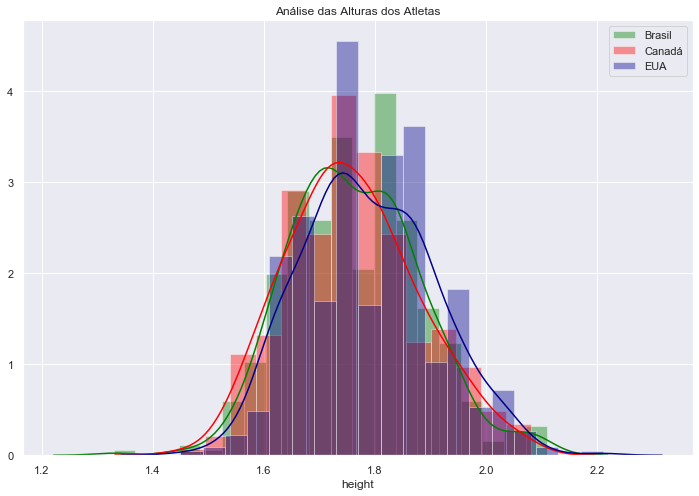

In [113]:
sns.distplot(bra.height.dropna(), color = 'green', label = 'Brasil')
sns.distplot(can.height.dropna(), color = 'red', label = 'Canadá')
sns.distplot(usa.height.dropna(), color = 'darkblue', label = 'EUA')
plt.title("Análise das Alturas dos Atletas")
plt.legend();

Através do gráfico podemos ver que o resultado da média dos atletas dos EUA é maior do que a dos outros países.